In [2]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df=pd.read_csv('D:\\Downloads\\vehicles.csv')
print(df.shape)
print(df.columns)
df.head()

(539759, 25)
Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


In [4]:
df.nunique(axis=0)

id              539759
url             539759
region             403
region_url         413
price            18386
year               113
manufacturer        43
model            36948
condition            6
cylinders            8
fuel                 5
odometer        122400
title_status         6
transmission         3
vin             181677
drive                3
size                 4
type                13
paint_color         12
image_url       364282
description     454053
county               0
state               51
lat              54587
long             54552
dtype: int64

In [5]:
df.describe().apply(lambda s:s.apply(lambda x: format(x,'f')))

,id,price,year,odometer,county,lat,long
count,539759.000000,539759.000000,538772.000000,440783.000000,0.000000,530785.000000,530785.000000
mean,7087608553.749804,195421.387573,2009.830982,100800.803259,nan,38.432128,-94.040501
std,5234175.784002,22082524.011577,9.161334,176705.802933,nan,5.916936,17.626658
min,7065764796.000000,0.000000,0.000000,0.000000,nan,-84.911400,-176.810000
25%,7084240305.500000,4400.000000,2007.000000,47038.500000,nan,34.197100,-106.782000
50%,7088972959.000000,9500.000000,2012.000000,93300.000000,nan,39.077600,-88.100900
75%,7092094043.000000,17926.000000,2015.000000,137755.000000,nan,42.449100,-81.219000
max,7093536715.000000,4294967295.000000,2021.000000,64809218.000000,nan,84.514800,161.016000


In [6]:
na_val=df.isna().sum()
def na_filter(na,threshold=.4):
    col_pass=[]
    for i in na.keys():
        if na[i]/df.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
df_cleaned=df[na_filter(na_val)]
df_cleaned.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission', 'drive',
       'type', 'paint_color', 'image_url', 'description', 'state', 'lat',
       'long'],
      dtype='object')

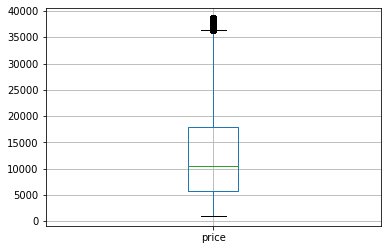

In [7]:
df_cleaned=df_cleaned[df_cleaned['price'].between(999.99,250000)]
q1=df_cleaned['price'].quantile(0.25)
q3=df_cleaned['price'].quantile(0.75)
iqr=q3-q1
df_filtered=df_cleaned.query('(@q1 - 1.5 * @iqr) <= price <= (@q3 + 1.5 *@iqr)')
df_filtered.boxplot('price')

In [8]:
df_filtered.describe().apply(lambda s: s.apply(lambda x: format(x,'f')))

,id,price,year,odometer,lat,long
count,464354.000000,464354.000000,463765.000000,383129.000000,460523.000000,460523.000000
mean,7087623849.464673,12748.572374,2009.409179,104964.186919,38.461849,-93.644432
std,5220950.531307,8682.629866,9.126002,183079.280853,5.905147,17.435375
min,7065764796.000000,1000.000000,0.000000,0.000000,-84.911400,-176.810000
25%,7084276125.500000,5708.500000,2006.000000,52532.000000,34.263900,-105.948000
50%,7088987016.500000,10550.000000,2011.000000,98152.000000,39.123400,-87.871700
75%,7092091386.750000,17995.000000,2015.000000,141500.000000,42.449000,-81.033900
max,7093536715.000000,38629.000000,2021.000000,64809218.000000,84.514800,161.016000


In [9]:
df_filtered=df_filtered[df_filtered['year'].between(1900,2020)]
df_filtered=df_filtered[df_filtered['odometer'].between(0,271431.5)]

In [10]:
df_final=df_filtered.copy().drop(['id','url','region_url','image_url','region','description','model','state','paint_color'], axis=1)

In [11]:
df_final.shape

(378282, 11)

In [12]:
df_final.describe()

,price,year,odometer,lat,long
count,378282.000000,378282.000000,378282.000000,375054.000000,375054.000000
mean,13485.515634,2010.451277,99863.857461,38.649627,-93.792458
std,8683.848464,7.034303,57685.741436,5.761292,17.632204
min,1000.000000,1908.000000,0.000000,-84.911400,-170.288000
25%,6300.000000,2007.000000,52134.000000,34.601900,-106.618500
50%,11900.000000,2012.000000,97466.500000,39.320000,-87.705200
75%,18975.000000,2015.000000,140000.000000,42.496500,-81.016150
max,38629.000000,2020.000000,271418.000000,84.514800,161.016000


In [13]:
import matplotlib.pylab as plt
import seaborn as sns

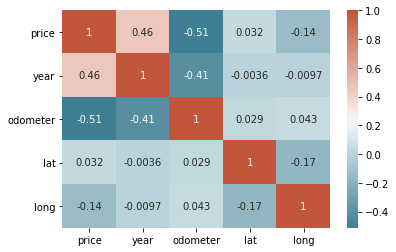

In [14]:
corr=df_final.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,cmap=sns.diverging_palette(220,20,as_cmap=True))

In [15]:
df_final.dropna(inplace=True)

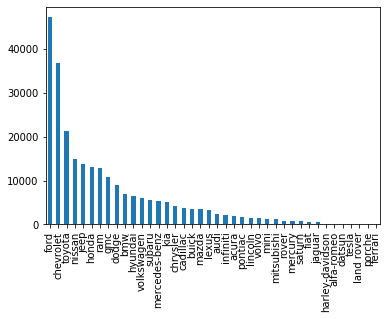

In [16]:
df_final['manufacturer'].value_counts().plot(kind='bar')

In [17]:
df_final.head()

,price,year,manufacturer,fuel,odometer,title_status,transmission,drive,type,lat,long
3,3995,2004.0,honda,gas,212526.0,clean,automatic,fwd,SUV,35.7636,-78.7443
5,12995,2015.0,kia,gas,85127.0,clean,automatic,4wd,wagon,35.7636,-78.7443
6,10995,2014.0,chevrolet,gas,112383.0,clean,automatic,fwd,SUV,35.7636,-78.7443
8,3995,2007.0,toyota,gas,185123.0,clean,automatic,fwd,convertible,35.7636,-78.7443
10,7995,2008.0,nissan,gas,162214.0,clean,automatic,fwd,pickup,35.7636,-78.7443


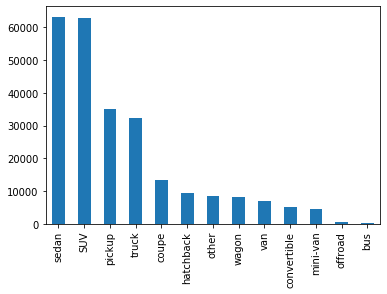

In [18]:
df_final['type'].value_counts().plot(kind="bar")

In [19]:
df_final=pd.get_dummies(df_final,drop_first=True)
print(df_final.columns)

Index(['price', 'year', 'odometer', 'lat', 'long', 'manufacturer_alfa-romeo',
       'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick',
       'manufacturer_cadillac', 'manufacturer_chevrolet',
       'manufacturer_chrysler', 'manufacturer_datsun', 'manufacturer_dodge',
       'manufacturer_ferrari', 'manufacturer_fiat', 'manufacturer_ford',
       'manufacturer_gmc', 'manufacturer_harley-davidson',
       'manufacturer_honda', 'manufacturer_hyundai', 'manufacturer_infiniti',
       'manufacturer_jaguar', 'manufacturer_jeep', 'manufacturer_kia',
       'manufacturer_land rover', 'manufacturer_lexus', 'manufacturer_lincoln',
       'manufacturer_mazda', 'manufacturer_mercedes-benz',
       'manufacturer_mercury', 'manufacturer_mini', 'manufacturer_mitsubishi',
       'manufacturer_nissan', 'manufacturer_pontiac', 'manufacturer_porche',
       'manufacturer_ram', 'manufacturer_rover', 'manufacturer_saturn',
       'manufacturer_subaru', 'manufacturer_tesla', 'manufacturer_toy

In [20]:
df_final.head()

,price,year,odometer,lat,long,manufacturer_alfa-romeo,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
3,3995,2004.0,212526.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,12995,2015.0,85127.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,10995,2014.0,112383.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3995,2007.0,185123.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,7995,2008.0,162214.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler
X_head = df_final.iloc[:, df_final.columns != 'price']
X=df_final.loc[:, df_final.columns != 'price']
y = df_final['price']
X = StandardScaler().fit_transform(X)
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [24]:
pred = model.predict(X_test)